<h1>Importando Livrarias</h1>

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h1>Obtendo dados</h1>

In [35]:
df = pd.read_csv("Classified Data", index_col=0)

In [36]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<h1> Normalizando as Variáveis </h1>

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [40]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [41]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


<h1>Divisão treino e teste</h1>

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

<h1> Usando o KNN </h1>

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
pred = knn.predict(X_test)

<h1> Previsões e Avaliações </h1>

Vamos avaliar o nosso modelo KNN

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(confusion_matrix(y_test,pred))

[[130  14]
 [ 11 145]]


In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       144
           1       0.91      0.93      0.92       156

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Escolhendo um valor K #
Vamos utilizar o método do cotovelo para escolher um bom valor K:

In [52]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

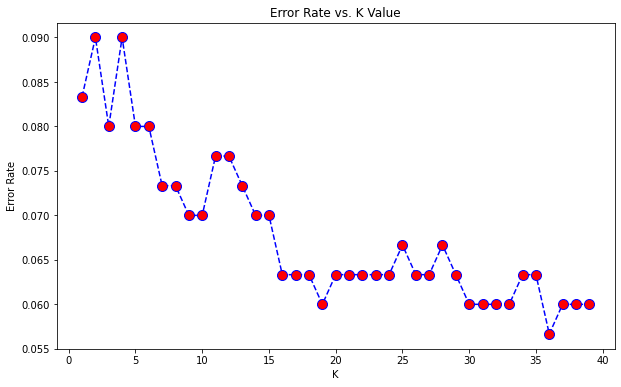

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Desse gráfico, percebe-se que a taxa de erro tende a a girar em 0.06 - 0.05 para K>23. Então, será melhor treinar novamente o modelo e  verificar o relatório de classificação com esse dado

In [55]:
# PRIMEIRA COMPARAÇÃO RÁPIDA PARA O NOSSO ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[130  14]
 [ 11 145]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       144
           1       0.91      0.93      0.92       156

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [56]:
# Agora com K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[131  13]
 [  6 150]]


              precision    recall  f1-score   support

           0       0.96      0.91      0.93       144
           1       0.92      0.96      0.94       156

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Com isso, conseguimos aumentar o desempenho do modelo, ajustado para um melhor valor de K.